In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import itertools

In [2]:
df_exp = pd.read_csv('../datasets/datasets_demand-forecasting-kernels-only_train.csv')
df_exp.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df_exp.shape

(913000, 4)

In [4]:
pd.set_option('display.max_rows',None)
df_exp[(df_exp['date']=='2013-01-01') & (df_exp['store']==1)]['sales'].sum()

1316

In [5]:
df_store = df_exp.groupby(['date','store'], as_index=False).agg({'sales':sum})

In [6]:
df_store[df_store['date']=='2013-01-01']

,date,store,sales
0,2013-01-01,1,1316
1,2013-01-01,2,1742
2,2013-01-01,3,1588
3,2013-01-01,4,1423
4,2013-01-01,5,1032
5,2013-01-01,6,1099
6,2013-01-01,7,964
7,2013-01-01,8,1628
8,2013-01-01,9,1383
9,2013-01-01,10,1521


In [7]:
df_store.shape

(18260, 3)

In [8]:
df_item = df_exp.groupby(['date','item'], as_index=False).agg({'sales':sum})
df_item[(df_item['date']=='2013-01-01') & (df_item['item']==1)]

,date,item,sales
0,2013-01-01,1,133


In [9]:
df_item.shape

(91300, 3)

In [10]:
df_item[df_item['date']=='2013-01-01']

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83
5,2013-01-01,6,288
6,2013-01-01,7,278
7,2013-01-01,8,416
8,2013-01-01,9,245
9,2013-01-01,10,378


In [11]:
df_exp[(df_exp['date']=='2013-01-01') & (df_exp['item']==1)]['sales'].sum()

133

In [12]:
df_temp = df_exp.groupby(['date','store','item'], as_index=False).agg({'sales':sum})

In [13]:
df_temp.shape

(913000, 4)

In [14]:
#So this grouping doesnot reduce the data
df_temp[df_temp['date']=='2013-01-01']

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-01,1,2,33
2,2013-01-01,1,3,15
3,2013-01-01,1,4,10
4,2013-01-01,1,5,11
5,2013-01-01,1,6,31
6,2013-01-01,1,7,25
7,2013-01-01,1,8,33
8,2013-01-01,1,9,18
9,2013-01-01,1,10,37


In [27]:
df_store_sorted = df_store.sort_values(['store','date'])

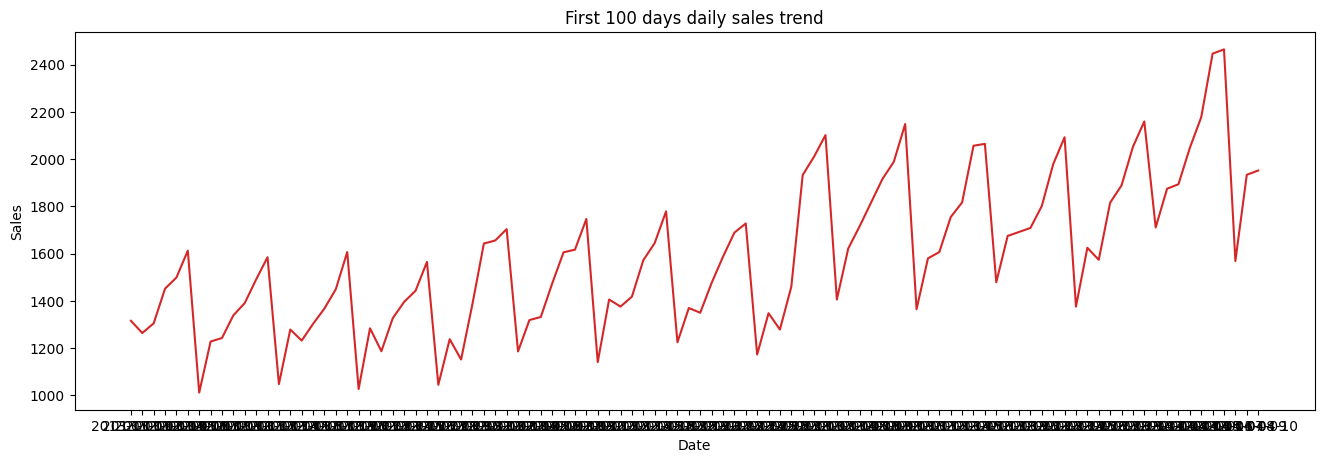

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_dataframe(df, x, y, title="", xlabel="Date", ylabel='Sales', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x,y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_dataframe(df_store_sorted, df_store_sorted.date[:100], df_store_sorted.sales[:100], title="First 100 days daily sales trend")

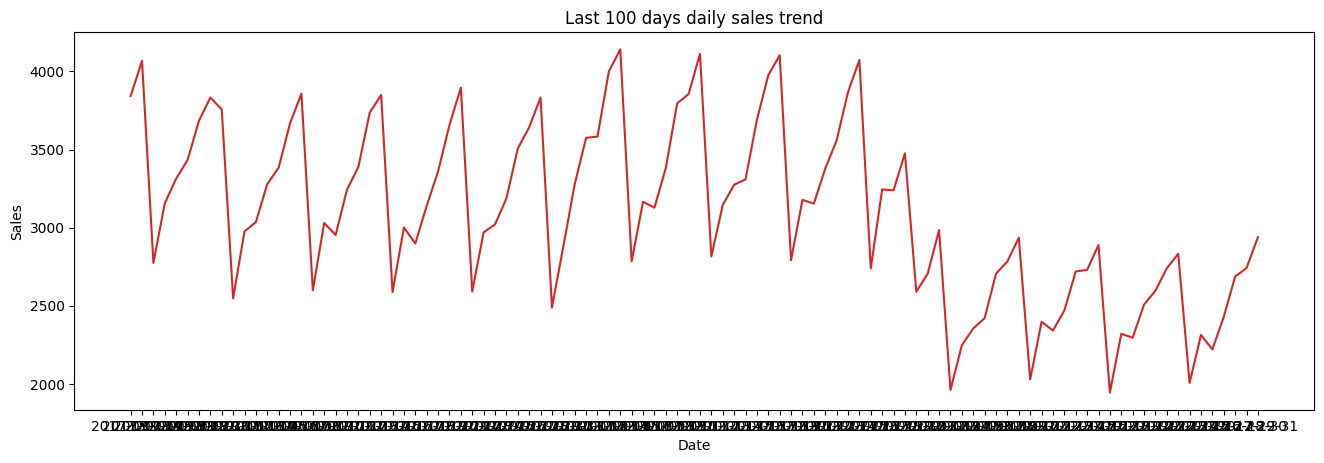

In [29]:
plot_dataframe(df_store_sorted, df_store_sorted.date.tail(100), df_store_sorted.sales.tail(100), title="Last 100 days daily sales trend")

In [42]:
df_train = df_store_sorted[:-3500]
df_train.shape
df_train.index = df_train['date']

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [37]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_train.sales, order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False
                                           )
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                    continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:274976.585131965
ARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:255905.1951283439
ARIMA(0, 0, 0)x(0, 1, 0, 7)12 - AIC:196361.5214232072
ARIMA(0, 0, 0)x(0, 1, 1, 7)12 - AIC:196188.78488194605
ARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:196360.3945091035
ARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:196264.16440355434
ARIMA(0, 0, 0)x(1, 1, 0, 7)12 - AIC:196201.5568076842
ARIMA(0, 0, 0)x(1, 1, 1, 7)12 - AIC:196190.77745705537
ARIMA(0, 0, 1)x(0, 0, 0, 7)12 - AIC:264296.81443817925
ARIMA(0, 0, 1)x(0, 0, 1, 7)12 - AIC:241055.23424412103
ARIMA(0, 0, 1)x(0, 1, 0, 7)12 - AIC:190248.80939651345
ARIMA(0, 0, 1)x(0, 1, 1, 7)12 - AIC:189460.41167930147
ARIMA(0, 0, 1)x(1, 0, 0, 7)12 - AIC:190251.06261214928
ARIMA(0, 0, 1)x(1, 0, 1, 7)12 - AIC:196773.0069954596
ARIMA(0, 0, 1)x(1, 1, 0, 7)12 - AIC:189511.99153696134
ARIMA(0, 0, 1)x(1, 1, 1, 7)12 - AIC:189458.71745641564
ARIMA(0, 1, 0)x(0, 0, 0, 7)12 - AIC:222360.29716400921
ARIMA(0, 1, 0)x(0, 0, 1, 7)12 - AIC:209400.0903726341
ARIMA(0, 1, 0)x(0,

In [136]:
mod = sm.tsa.statespace.SARIMAX(df_train.sales,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9426      0.002    406.085      0.000       0.938       0.947
ma.L1         -0.3155      0.006    -56.155      0.000      -0.327      -0.305
ma.S.L7       -0.6244      0.004   -168.948      0.000      -0.632      -0.617
sigma2      1.231e+04     48.493    253.915      0.000    1.22e+04    1.24e+04


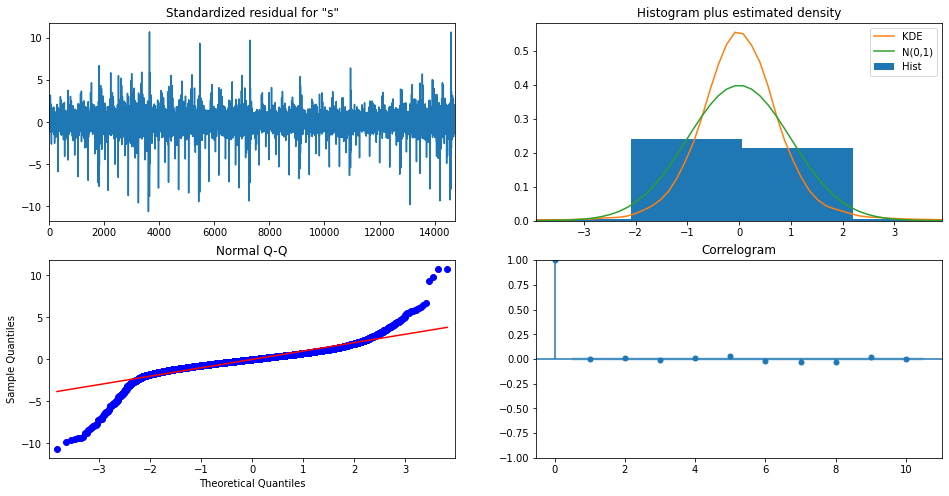

In [46]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


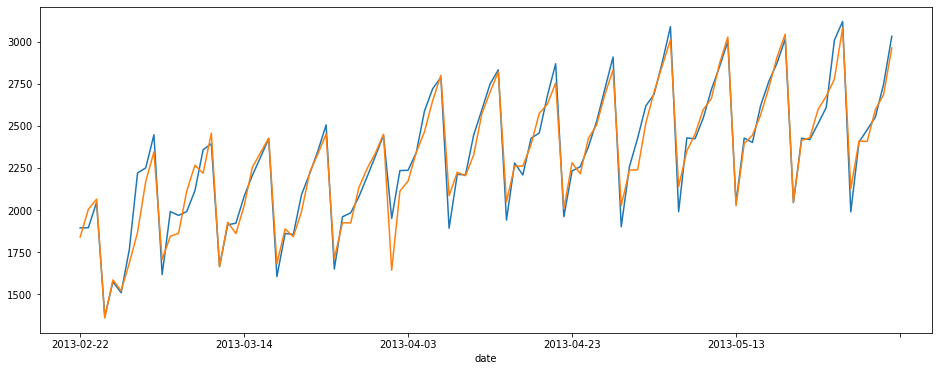

In [119]:
pred = results.get_prediction(df_train.index[0])
pred_ci = pred.conf_int()
df_print = df_store_sorted
df_print.index = df_print['date']
ax = df_print.sales.tail(4)
res_df_1 = pd.DataFrame(pred.predicted_mean)
res_df_1.reset_index(drop=True,inplace=True)
res_df_1.index= df_train.index
res_df_1['sales'] = df_train['sales']

res_df_1['date'] = df_train['date']
plt.figure(figsize=(16,6))
res_df_1.sales.tail(100).plot()
res_df_1.predicted_mean.tail(100).plot()
plt.show()

In [134]:
results.forecast(10)

14760    3140.718584
14761    2103.050868
14762    2486.876251
14763    2511.633586
14764    2625.760962
14765    2769.277833
14766    3020.963898
14767    3144.892126
14768    2106.984645
14769    2490.584037
Name: predicted_mean, dtype: float64

In [126]:
df_train.shape

(14760, 3)

In [54]:
df_train[df_train['date']=='2017-01-01']

,date,store,sales
date,,,
2017-01-01,2017-01-01,1,2155
2017-01-01,2017-01-01,2,3044
2017-01-01,2017-01-01,3,2753
2017-01-01,2017-01-01,4,2441
2017-01-01,2017-01-01,5,1819
2017-01-01,2017-01-01,6,1780
2017-01-01,2017-01-01,7,1638
2017-01-01,2017-01-01,8,2823


SyntaxError: invalid token (<ipython-input-69-73803e58099b>, line 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import itertools

In [2]:
df = pd.read_csv('Forecast.csv', parse_dates=['date'])

In [3]:
df.head()

,Unnamed: 0,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
0,0,2013-01-01,1,1,South Asia,India,Rajasthan,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1,13
1,1,2013-01-02,1,1,South Asia,India,Rajasthan,Bikaner,37.292233,-121.881279,Standard Class,CASH,0,11
2,2,2013-01-03,1,1,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1,14
3,3,2013-01-04,1,1,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1,13
4,4,2013-01-05,1,1,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1,10


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(10)

,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
0,2013-01-01,1,1,South Asia,India,Rajasthan,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1,13
1,2013-01-02,1,1,South Asia,India,Rajasthan,Bikaner,37.292233,-121.881279,Standard Class,CASH,0,11
2,2013-01-03,1,1,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1,14
3,2013-01-04,1,1,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1,13
4,2013-01-05,1,1,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1,10
5,2013-01-06,1,1,South Asia,India,Madhya pradesh,Jabalpur,33.898693,-118.174560,First Class,CASH,1,12
6,2013-01-07,1,1,South Asia,India,Madhya pradesh,Jabalpur,18.233778,-66.037064,First Class,DEBIT,1,10
7,2013-01-08,1,1,South Asia,India,Madhya pradesh,Jabalpur,42.048306,-87.961342,Same Day,PAYMENT,0,9
8,2013-01-09,1,1,South Asia,India,Madhya pradesh,Jabalpur,33.782452,-118.192245,Same Day,TRANSFER,0,12
9,2013-01-10,1,1,South Asia,India,Madhya pradesh,Jabalpur,18.283377,-66.037056,Standard Class,TRANSFER,1,9


In [5]:
df['date'].min()

Timestamp('2013-01-01 00:00:00')

In [6]:
df['date'].max()

Timestamp('2017-12-31 00:00:00')

In [7]:
df.isnull().sum()

date                     0
store                    0
item                     0
Order Region             0
Order Country            0
Order State              0
Order City               0
Latitude                 0
Longitude                0
Shipping Mode            0
Type                     0
Late Delivery In Days    0
sales                    0
dtype: int64

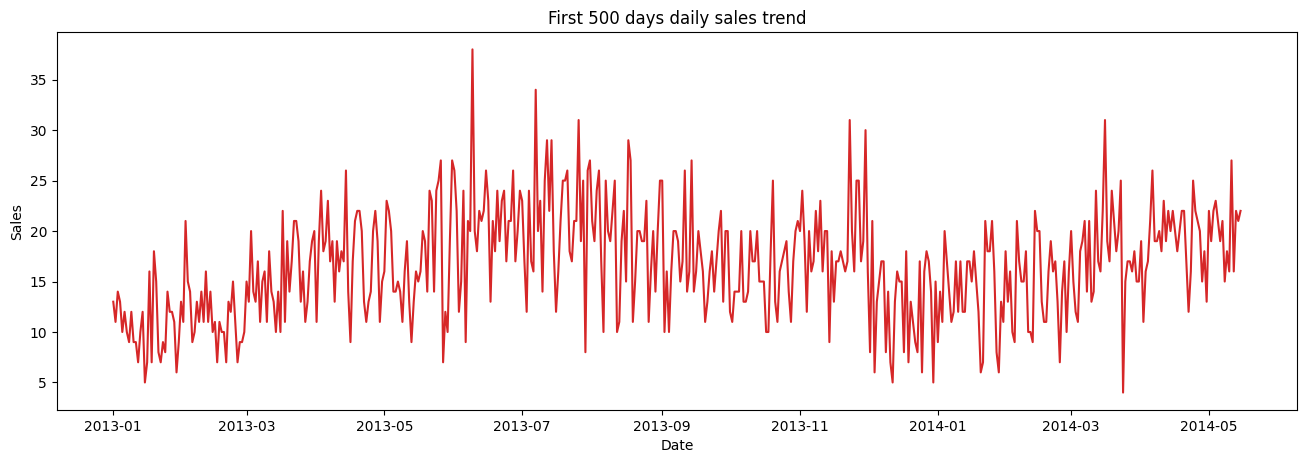

In [8]:
def plot_dataframe(df, x, y, title="", xlabel="Date", ylabel='Sales', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x,y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_dataframe(df, df.date[:500], df.sales[:500], title="First 500 days daily sales trend")

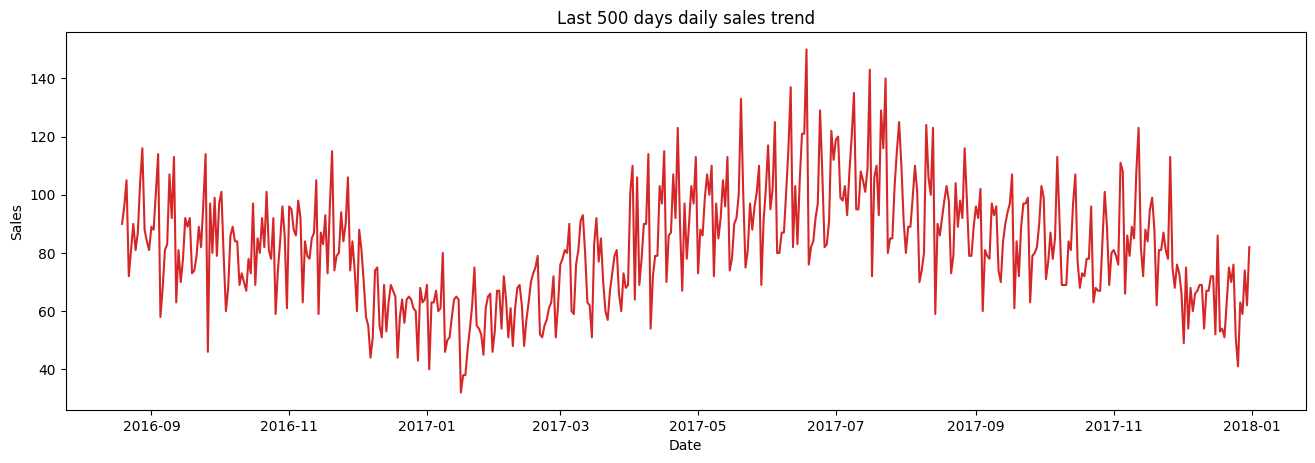

In [9]:
plot_dataframe(df, df.date.tail(500), df.sales.tail(500), title="Last 500 days daily sales trend")

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

In [10]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
df = pd.read_csv('Forecast.csv', parse_dates=['date'],index_col='date')
df.drop(columns=['Unnamed: 0'], inplace=True)


#multiplicative decomposition
#result_multiplicative = seasonal_decompose(df['sales'], model = 'multiplicative', extrapolate_trend='freq', period=30)


#Additive decomposition
result_additive = seasonal_decompose(df.sales, model = 'additive', extrapolate_trend='freq', period=30)



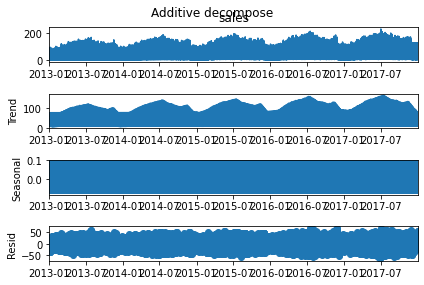

In [12]:
#result_multiplicative.plot().suptitle('Multiplicative decompose', fontsize=22)
result_additive.plot().suptitle('Additive decompose')
plt.show()

<AxesSubplot:xlabel='date'>

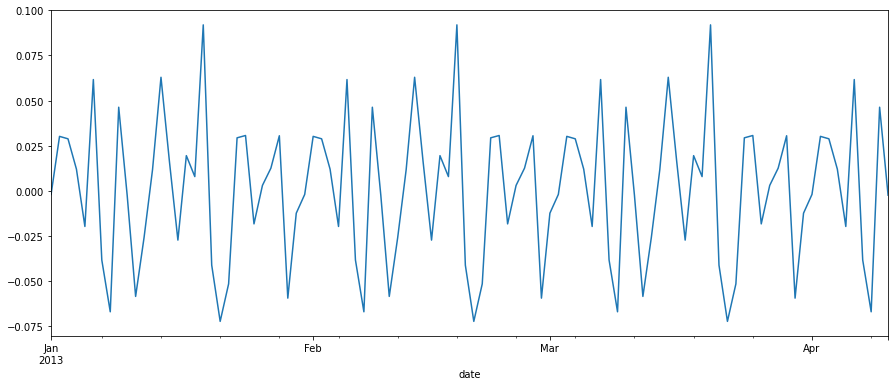

In [13]:
plt.figure(figsize=(15,6))
result_additive.seasonal[:100].plot()

In [16]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [47]:
df['date']= df.index
df_train = df[df['date'].dt.year.eq(2017)]
df_train.drop(columns=['date'])
df_train

,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales,date
date,,,,,,,,,,,,,
2017-01-01,1,1,South Asia,India,Chhattisgarh,Raipur,34.169819,-118.378990,Standard Class,DEBIT,2,19,2017-01-01
2017-01-02,1,1,South Asia,India,Maharashtra,Malegaon,41.499928,-90.515411,Standard Class,DEBIT,-1,15,2017-01-02
2017-01-03,1,1,South Asia,India,Maharashtra,Ulhasnagar,33.566879,-117.763321,Standard Class,DEBIT,1,10,2017-01-03
2017-01-04,1,1,South Asia,India,Maharashtra,Ulhasnagar,33.566879,-117.763321,Standard Class,DEBIT,1,16,2017-01-04
2017-01-05,1,1,South Asia,India,Madhya pradesh,Jabalpur,35.158192,-89.784798,Standard Class,DEBIT,1,14,2017-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,West of USA,United States,California,The Angels,18.248693,-66.370590,Second Class,DEBIT,0,63,2017-12-27
2017-12-28,10,50,US Center,United States,Minnesota,Lakeville,33.589874,-112.116371,Second Class,PAYMENT,3,59,2017-12-28
2017-12-29,10,50,US Center,United States,Wisconsin,Sheboygan,35.803886,-77.470673,Same Day,PAYMENT,0,74,2017-12-29


In [48]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_train.sales, order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False
                                           )
            #results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                    continue
            

In [49]:
mod = sm.tsa.statespace.SARIMAX(df_train.sales,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


MemoryError: Unable to allocate 941. MiB for an array with shape (26, 26, 182500) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 1004, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
MemoryError: ((26, 26, 182500), dtype('float64'))


AttributeError: Memoryview is not initialized

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
df.head()

In [ ]:
df.index.min()

In [ ]:
df.index.max()

In [ ]:
df.drop(columns=['date'], inplace=True)

In [34]:
df['2014':]

AssertionError: <class 'numpy.ndarray'>